<a href="https://colab.research.google.com/github/ihebbennaceur/british-air-ways/blob/main/final_britsh_air.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to extract star rating from span elements
def extract_star_rating(span):
    if span:
        stars = span.find_all('span', class_='star')
        return sum(1 if 'fill' in star.get('class') else 0 for star in stars)
    else:
        return None

# Initialize lists to store data
notes = []
client_status = []
client_review = []
aircraft_list = []
type_of_traveller_list = []
seat_type_list = []
route_list = []
date_flown_list = []
seat_comfort_list = []
cabin_staff_service_list = []
food_and_beverages_list = []
ground_service_list = []
value_for_money_list = []
recommended_list = []

# Specify the airline name and number of pages to scrape
name = 'british-airways'
num_pages = 200

# Loop through the specified number of pages
for k in range(num_pages):
    r2 = requests.get(f'https://www.airlinequality.com/airline-reviews/{name}/page/{k}')
    soup2 = BeautifulSoup(r2.text, "html.parser")

    elements1 = soup2.find_all('span', itemprop='ratingValue')

    for element in elements1:
        notes.append(element.get_text(strip=True))

    descriptions = soup2.find_all('div', attrs={'class': 'text_content'})

    for description in descriptions:
        parts = description.text.split('|')
        if len(parts) == 2:
            client_status.append(parts[0].strip())
            client_review.append(parts[1].strip())
        else:
            client_status.append('')
            client_review.append('')

    # All lists have the same length
    min_length = min(len(notes), len(client_status), len(client_review))
    notes = notes[:min_length]
    client_status = client_status[:min_length]
    client_review = client_review[:min_length]

    # Extract review statistics elements
    elements = soup2.find_all('div', attrs={'class': 'review-stats'})

    # Each review statistics
    for element in elements:
        aircraft = element.find('td', attrs={'class': 'review-rating-header aircraft'})
        type_of_traveller = element.find('td', attrs={'class': 'review-rating-header type_of_traveller'})
        seat_type = element.find('td', attrs={'class': 'review-rating-header cabin_flown'})
        route = element.find('td', attrs={'class': 'review-rating-header route'})
        date_flown = element.find('td', attrs={'class': 'review-rating-header date_flown'})
        seat_comfort = element.find('td', attrs={'class': 'review-rating-header seat_comfort'})
        cabin_staff_service = element.find('td', attrs={'class': 'review-rating-header cabin_staff_service'})
        food_and_beverages = element.find('td', attrs={'class': 'review-rating-header food_and_beverages'})
        ground_service = element.find('td', attrs={'class': 'review-rating-header ground_service'})
        value_for_money = element.find('td', attrs={'class': 'review-rating-header value_for_money'})
        recommended = element.find('td', attrs={'class': 'review-rating-header recommended'})

        # Populate the lists with extracted values
        aircraft_list.append(aircraft.find_next('td', class_='review-value').get_text(strip=True) if aircraft else None)
        type_of_traveller_list.append(type_of_traveller.find_next('td', class_='review-value').get_text(strip=True) if type_of_traveller else None)
        seat_type_list.append(seat_type.find_next('td', class_='review-value').get_text(strip=True) if seat_type else None)
        route_list.append(route.find_next('td', class_='review-value').get_text(strip=True) if route else None)
        date_flown_list.append(date_flown.find_next('td', class_='review-value').get_text(strip=True) if date_flown else None)
        seat_comfort_list.append(extract_star_rating(seat_comfort.find_next('td', class_='review-rating-stars')) if seat_comfort else None)
        cabin_staff_service_list.append(extract_star_rating(cabin_staff_service.find_next('td', class_='review-rating-stars')) if cabin_staff_service else None)
        food_and_beverages_list.append(extract_star_rating(food_and_beverages.find_next('td', class_='review-rating-stars')) if food_and_beverages else None)
        ground_service_list.append(extract_star_rating(ground_service.find_next('td', class_='review-rating-stars')) if ground_service else None)
        value_for_money_list.append(extract_star_rating(value_for_money.find_next('td', class_='review-rating-stars')) if value_for_money else None)
        recommended_list.append(int(recommended.find_next('td', class_='review-value').get_text(strip=True).lower() == 'yes') if recommended else None)

# Create a dictionary from the lists
data = {
    'Notes': notes,
    'Client Status': client_status,
    'Client Review': client_review,
    'Aircraft': aircraft_list,
    'Type Of Traveller': type_of_traveller_list,
    'Seat Type': seat_type_list,
    'Route': route_list,
    'Date Flown': date_flown_list,
    'Seat Comfort': seat_comfort_list,
    'Cabin Staff Service': cabin_staff_service_list,
    'Food & Beverages': food_and_beverages_list,
    'Ground Service': ground_service_list,
    'Value For Money': value_for_money_list,
    'Recommended': recommended_list
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
display(df)


,Notes,Client Status,Client Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended
0,5,✅ Trip Verified,Despite boarding being the usual free for all ...,Boeing 787,Couple Leisure,Business Class,London to Santiago,September 2023,3.0,5.0,4.0,2.0,5,1
1,8,Not Verified,"Flight cancelled, no crew! 9th September 2023,...",A320,Couple Leisure,Business Class,London Heathrow to Faro,September 2023,NaN,NaN,NaN,1.0,1,0
2,1,Not Verified,"The worst service ever, my baggage did not arr...",None,Solo Leisure,Economy Class,Kuwait to Lisbon via London,September 2023,3.0,1.0,1.0,3.0,3,0
3,1,✅ Trip Verified,4/4 flights we booked this holiday were delaye...,A320,Couple Leisure,Economy Class,London to Munich,September 2023,1.0,3.0,1.0,1.0,1,0
4,1,✅ Trip Verified,British Airways has a total lack of respect fo...,None,Solo Leisure,Economy Class,Frankfurt to London City,September 2023,1.0,NaN,NaN,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,✅ Verified Review,"Had pre-booked seat 14k and, on taking seat, n...",None,Solo Leisure,Premium Economy,CNX to LHR via BKK,September 2016,3.0,4.0,3.0,1.0,2,0
1996,1,,,Boeing 747 400,Couple Leisure,Business Class,LHR to LAX,September 2016,5.0,3.0,4.0,5.0,4,1
1997,8,✅ Verified Review,"Tokyo Haneda to London, and British Airways is...",Boeing 777-300,Business,Premium Economy,HND to LHR,October 2016,2.0,2.0,1.0,3.0,2,0
1998,1,✅ Verified Review,I had a perfectly satisfactory flight with Bri...,Boeing 747,Solo Leisure,First Class,LHR to BOS,October 2016,4.0,4.0,3.0,4.0,4,1


In [3]:
df.to_csv('iheb.csv', index=False)

In [4]:
new=pd.read_csv('/content/iheb.csv')
new.head()

,Notes,Client Status,Client Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended
0,5,✅ Trip Verified,Despite boarding being the usual free for all ...,Boeing 787,Couple Leisure,Business Class,London to Santiago,September 2023,3.0,5.0,4.0,2.0,5,1
1,8,Not Verified,"Flight cancelled, no crew! 9th September 2023,...",A320,Couple Leisure,Business Class,London Heathrow to Faro,September 2023,NaN,NaN,NaN,1.0,1,0
2,1,Not Verified,"The worst service ever, my baggage did not arr...",NaN,Solo Leisure,Economy Class,Kuwait to Lisbon via London,September 2023,3.0,1.0,1.0,3.0,3,0
3,1,✅ Trip Verified,4/4 flights we booked this holiday were delaye...,A320,Couple Leisure,Economy Class,London to Munich,September 2023,1.0,3.0,1.0,1.0,1,0
4,1,✅ Trip Verified,British Airways has a total lack of respect fo...,NaN,Solo Leisure,Economy Class,Frankfurt to London City,September 2023,1.0,NaN,NaN,1.0,1,0


# ***Analysis time***

In [5]:
pip install  wordcloud nltk textblob

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import TextBlob
import nltk

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

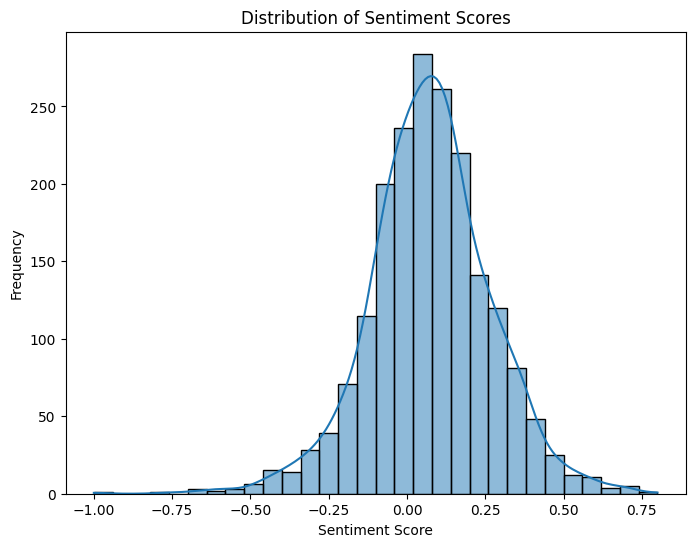

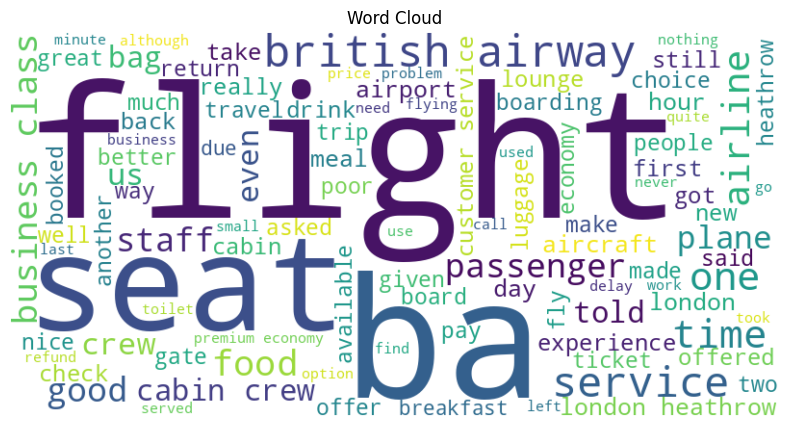

In [9]:
df = new.copy()

# data cleaning
df.drop_duplicates(inplace=True)
df.dropna(subset=['Client Review'], inplace=True)
df['Date Flown'] = pd.to_datetime(df['Date Flown'])

# text Preprocessing
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize and remove punctuation and numbers
    words = nltk.word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha()]
    words = [word for word in words if word not in stop_words]
    # You can add lemmatization or stemming here if desired
    return ' '.join(words)

df['Cleaned Review'] = df['Client Review'].apply(preprocess_text)

# EDA - Example: Distribution of Sentiment Scores
df['Sentiment'] = df['Cleaned Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(8, 6))
sns.histplot(df['Sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(df['Cleaned Review']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()


In [10]:
new.columns

Index(['Notes', 'Client Status', 'Client Review', 'Aircraft',
       'Type Of Traveller', 'Seat Type', 'Route', 'Date Flown', 'Seat Comfort',
       'Cabin Staff Service', 'Food & Beverages', 'Ground Service',
       'Value For Money', 'Recommended'],
      dtype='object')

# ***mean ***

In [11]:
# Calculate the mean based on 'Client Status'
mean_ratings_by_status = new.groupby('Client Status')['Notes'].mean()
mean_ratings_by_status

Client Status
Not Verified         3.925234
✅ Trip Verified      4.378114
✅ Verified Review    4.114478
❎ Not Verified       4.200000
❎ Unverified         4.150000
Name: Notes, dtype: float64

# ***recommande 0 = no  1 =yes ***

In [12]:
new['Recommended'].value_counts()

0    1359
1     641
Name: Recommended, dtype: int64

In [13]:
new['Recommended'] = new['Recommended'].replace({0: 'no', 1: 'yes'})

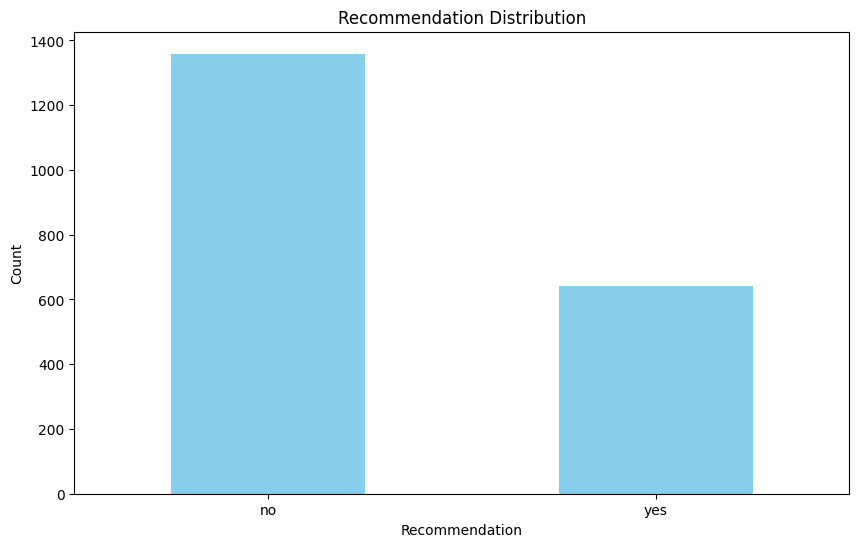

In [22]:
plt.figure(figsize=(10, 6))
new['Recommended'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Recommendation Distribution')
plt.xlabel('Recommendation')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# ***Correlations***

<ipython-input-19-5b9a1e8052b5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = new.corr()


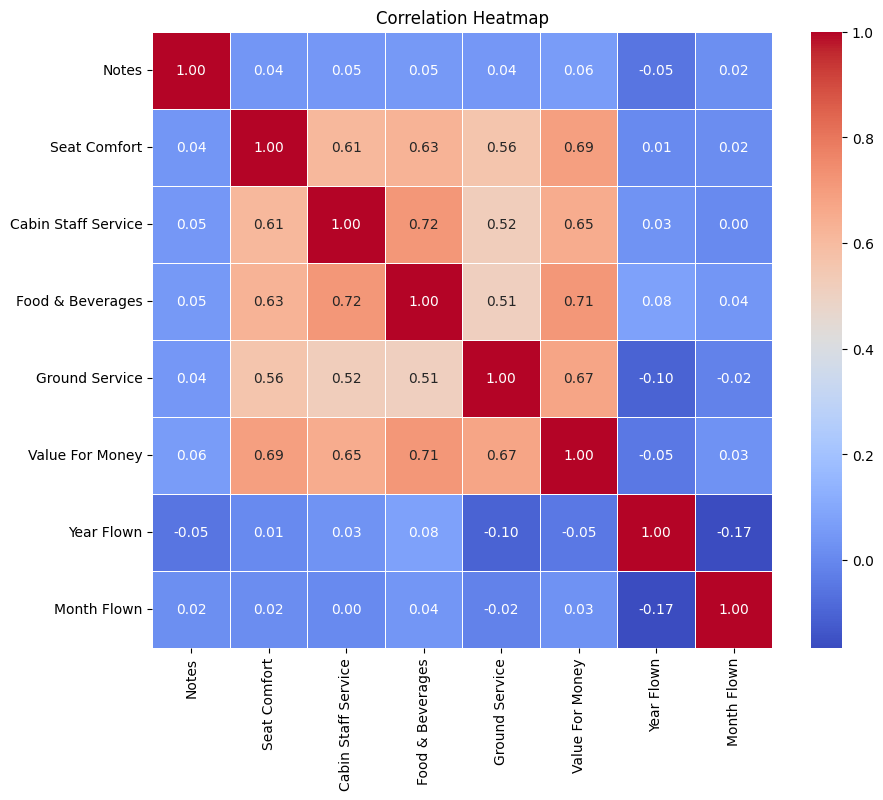

In [19]:
correlation_matrix = new.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
new['Date Flown'] = pd.to_datetime(new['Date Flown'], format='%B %Y', errors='coerce')

# extract year and month separately
new['Year Flown'] = new['Date Flown'].dt.year
new['Month Flown'] = new['Date Flown'].dt.month

# Count the number of reviews per year and month
yearly_counts = new['Year Flown'].value_counts().sort_index()
monthly_counts = new.groupby(['Year Flown', 'Month Flown']).size().unstack(fill_value=0)

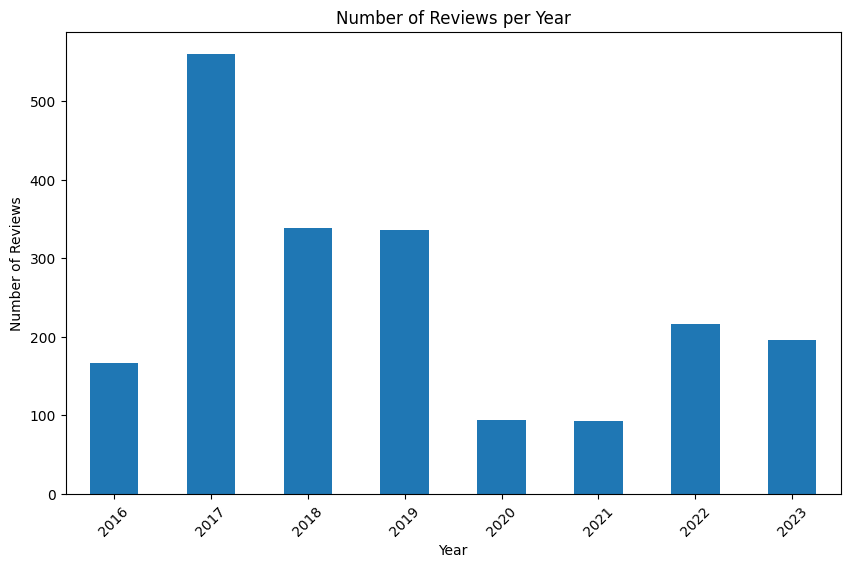

In [17]:
yearly_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

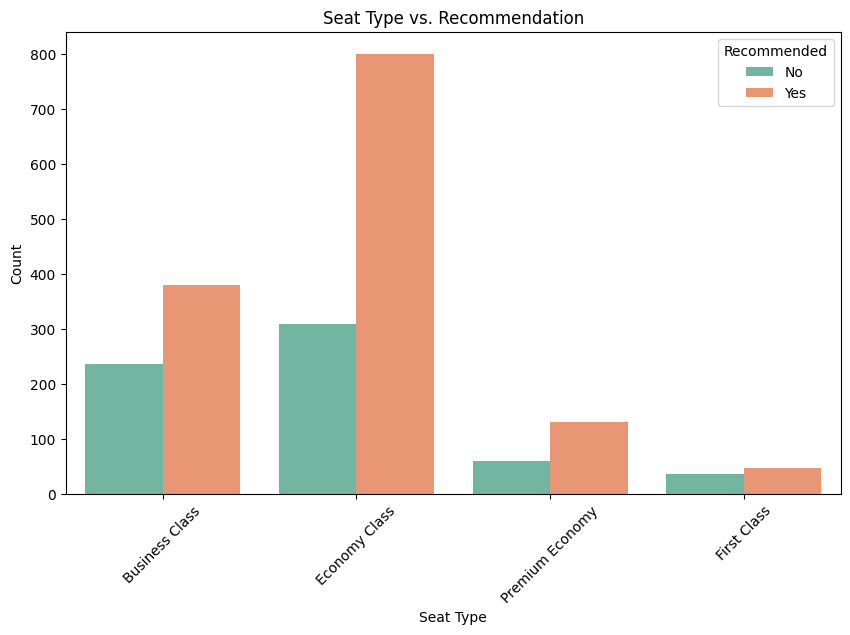

In [20]:

plt.figure(figsize=(10, 6))
sns.countplot(data=new, x='Seat Type', hue='Recommended', palette='Set2')
plt.title('Seat Type vs. Recommendation')
plt.xlabel('Seat Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Recommended', labels=['No', 'Yes'])
plt.show()

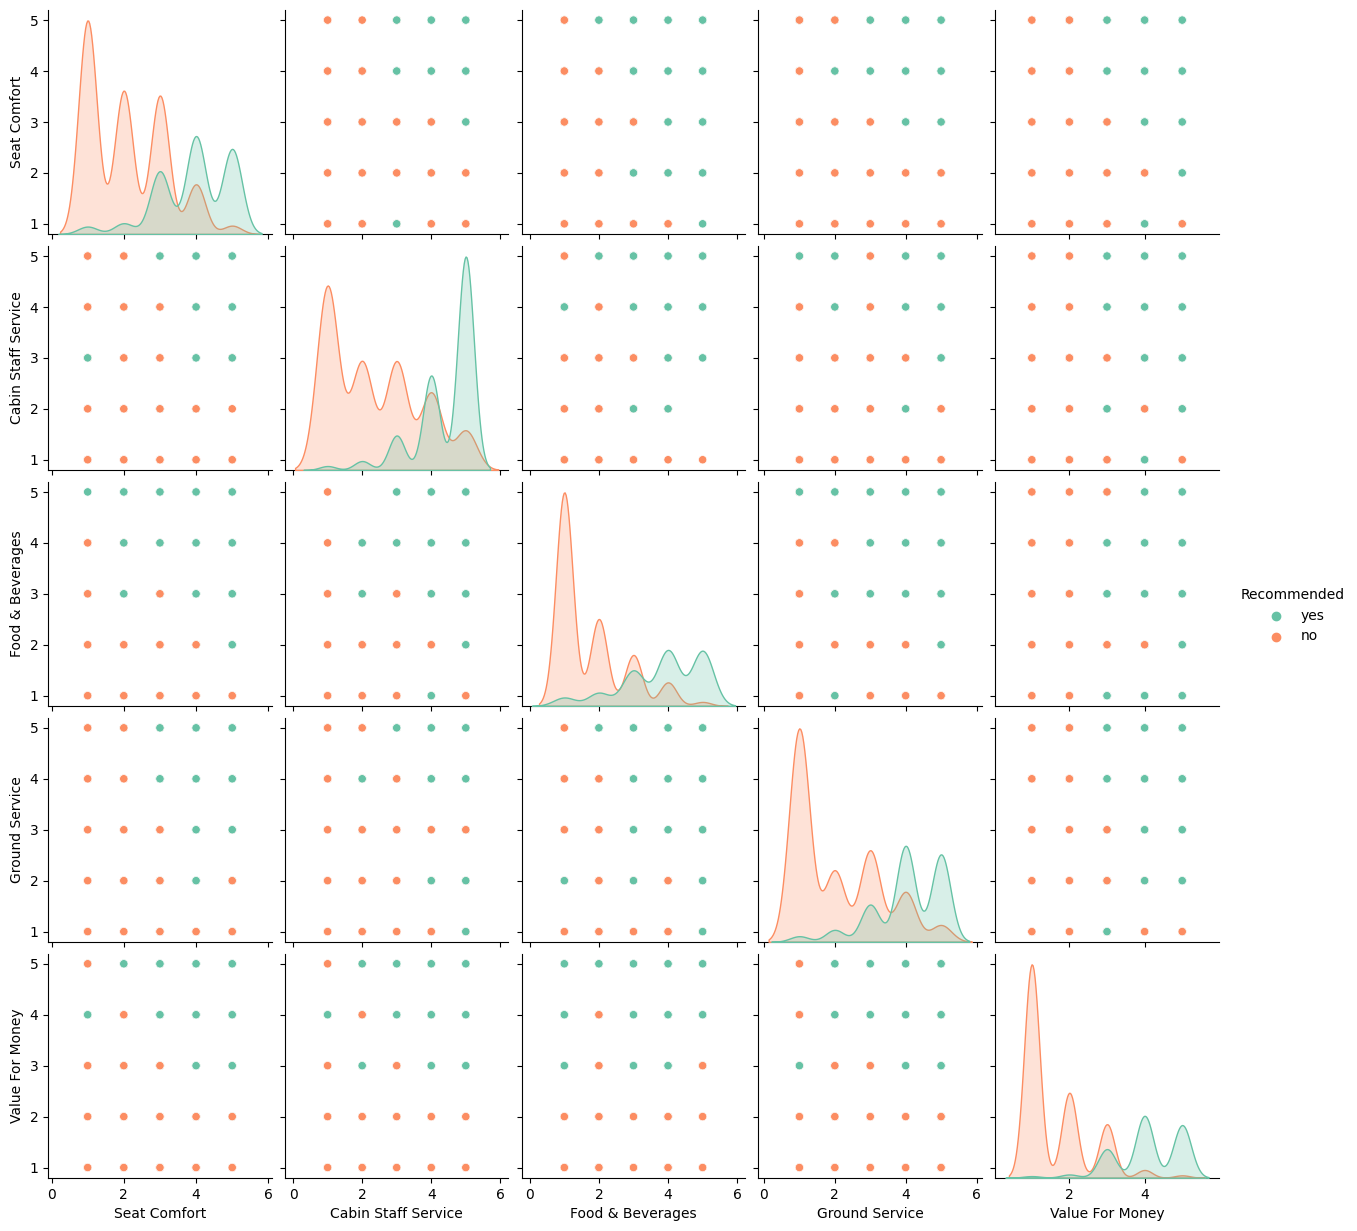

In [23]:
sns.pairplot(new[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Value For Money', 'Recommended']], hue='Recommended', palette='Set2')
plt.show()

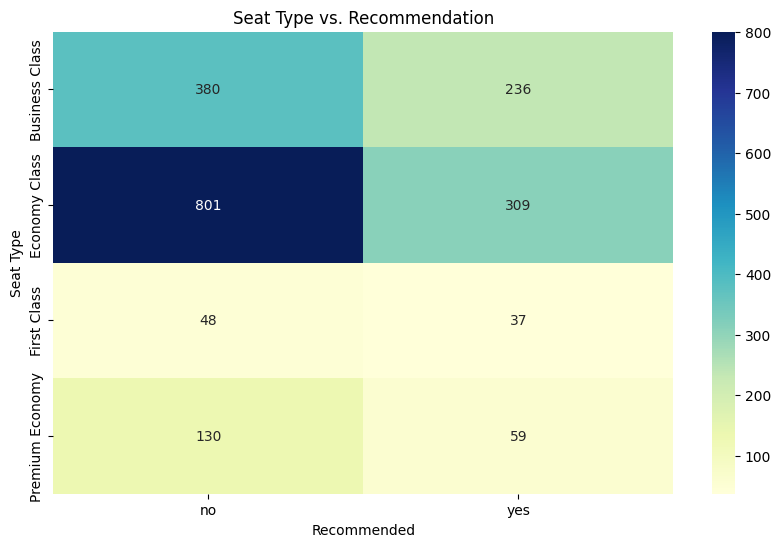

In [24]:
pivot_table = new.pivot_table(index='Seat Type', columns='Recommended', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Seat Type vs. Recommendation')
plt.xlabel('Recommended')
plt.ylabel('Seat Type')
plt.show()